In [1]:
import Pkg; using Pkg

Pkg.add("MultivariateStats")
Pkg.add("RDatasets")
Pkg.add("Plots")
Pkg.add("CSV")

using MultivariateStats, RDatasets
using Plots
using CSV


   Resolving package versions...
  No Changes to `/usr/local/julia/Project.toml`
  No Changes to `/usr/local/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `/usr/local/julia/Project.toml`
  No Changes to `/usr/local/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `/usr/local/julia/Project.toml`
  No Changes to `/usr/local/julia/Manifest.toml`
   Resolving package versions...
  No Changes to `/usr/local/julia/Project.toml`
  No Changes to `/usr/local/julia/Manifest.toml`


In [2]:
function ReadCSVFile( fileName::String, addOnes="NO" )::DataFrame

	if addOnes== "NO"
		df = DataFrame(CSV.File( fileName))
		return df
	end

	if addOnes== "YES"
		df1 = DataFrame(CSV.File( fileName))
		nr = nrow(df1)
		#create a df of size (nr, 1) with ones in first column
		df2 = DataFrame(ones(nr, 1), :auto)
		# return a df with ones and the content from the CSV file
		df = hcat(df2, df1)
		#rename firt column as "x0" to be consistent woth regression
		n = names(df)
		rename!(df, n[1] => "x0")
		return df
	end

end

function DfConfig( df::DataFrame, cv::Vector) :: DataFrame
	return select( df, cv)
end



DfConfig (generic function with 1 method)

The code below uses the Iris dataset and prepares it for ML analysis (specifically, LDA). Here's a breakdown:

iris: This is the data set, loaded from RDatasets.dataset("datasets", "iris").

```
iris[1:2:end, 1:4]`
Extract a subset of the data:

1:2:end
Select every second row from the dataset, starting with the first. This is a way to sample the data, effectively taking half of the observations.

1:4
Select  the first four columns of the dataset. These columns correspond to the four parameters in X (sepal length, sepal width, petal length, petal width).

Matrix(...)
Convert the selected subset into a matrix. This is necessary because the ML algorithms expect data in matrix form.

'
Transposes the matrix to ensure the correct format where each row represents a single observation (Y) and each column represents a parameter.

In summary: Get the Iris dataset, sample 50% of the rows, selects the 4 params as X, convert this subset into a matrix, and then transposes it
to have observations in rows and features in columns. This prepares the data for analysis (PCA or LDA).


In [8]:
iris = dataset("datasets", "iris")

@show(typeof(iris))
@show(describe( iris ))

#typeof(iris)
#describe(iris)

X = Matrix(iris[1:2:end,1:4])'
X_labels = Vector(iris[1:2:end,5])

# println( X_labels )

#
pca = fit(PCA, X; maxoutdim=2)
Ypca = predict(pca, X)

typeof(iris) = DataFrame
describe(iris) = 5×7 DataFrame
 Row │ variable     mean     min     median  max        nmissing  eltype
     │ Symbol       Union…   Any     Union…  Any        Int64     DataType
─────┼────────────────────────────────────────────────────────────────────────────────────────────
   1 │ SepalLength  5.84333  4.3     5.8     7.9               0  Float64
   2 │ SepalWidth   3.05733  2.0     3.0     4.4               0  Float64
   3 │ PetalLength  3.758    1.0     4.35    6.9               0  Float64
   4 │ PetalWidth   1.19933  0.1     1.3     2.5               0  Float64
   5 │ Species               setosa          virginica         0  CategoricalValue{String, UInt8}


2×75 Matrix{Float64}:
 2.71359    2.90321   2.75875   …  -2.39001   -1.51972   -1.87717
 0.238246  -0.233575  0.228345      0.333917  -0.297498   0.0985705

# Similarities between PCA and LDA

[https://docs.google.com/presentation/d/1zOikKpq_FGpoptS3rTKSr1s7ILBI_5Dgx0aloXe3j04/edit#slide=id.g2d42e3cf5e0_0_22]

[https://docs.google.com/presentation/d/1zOikKpq_FGpoptS3rTKSr1s7ILBI_5Dgx0aloXe3j04/edit#slide=id.g2d42e3cf5e0_0_13]

-0.759   -0.685   -0.773   -0.660   -0.580   -0.803   -0.671   -0.955   -0.802   -0.765   -0.699   -0.823   -0.619   -0.607   -0.744   -0.612   -0.918   -0.638   -0.806   -0.621   -0.729   -0.664   -0.642   -0.785   -0.796   
-0.766   -0.703   -0.795   -0.782   -0.620   -0.804   -0.607   -0.902   -0.938   -0.838   -0.706   -0.840   -0.702   -0.786   -0.737   -0.648   -0.886   -0.654   -0.766   -0.656   -0.808   -0.710   -0.866   -0.830   -0.807   
0.321   0.431   0.465   0.432   0.352   0.319   0.303   0.227   0.465   0.597   0.585   0.603   0.308   0.441   0.459   0.298   0.273   0.479   0.406   0.303   0.413   0.314   0.388   0.337   0.148   
-0.726   -0.715   -0.669   -0.831   -0.632   -0.429   -0.416   -0.742   -0.753   -0.523   -0.867   -0.567   -0.663   -0.614   -0.717   -0.530   -0.626   -0.758   -0.737   -0.726   -0.563   -0.591   -0.636   -0.688   -0.636   
1.063   0.885   0.949   0.706   0.876   0.686   0.828   0.989   0.723   1.209   0.901   1.000   0.809   0.651   0.919   0

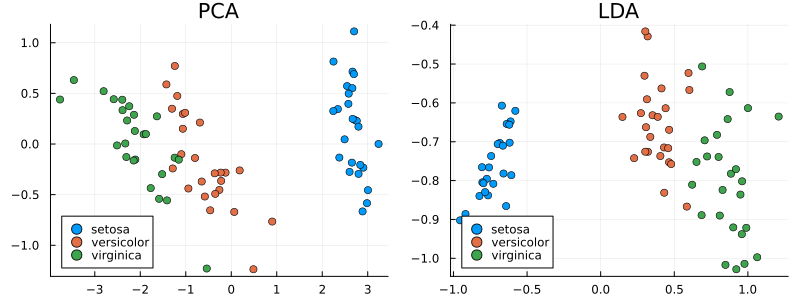

In [9]:
using Printf

function print_vector(vec::Vector{Float64})
    for num in vec
      @printf("%.3f   ", num) 
    end
  end

lda = fit(MulticlassLDA, X, X_labels; outdim=2)
Ylda = predict(lda, X)

p = plot(layout=(1,2), size=(800,300))

for s in ["setosa", "versicolor", "virginica"]

    points = Ypca[:,X_labels.==s]
    scatter!(p[1], points[1,:],points[2,:], label=s, legend=:bottomleft)
    points = Ylda[:,X_labels.==s]
    scatter!(p[2], points[1,:],points[2,:], label=s, legend=:bottomleft)

    for i in 1:2
        print_vector( points[i,:] )
        println()
    end
    
end

plot!(p[1], title="PCA")
plot!(p[2], title="LDA")



## How to interpret the LDA Output

[https://docs.google.com/presentation/d/1zOikKpq_FGpoptS3rTKSr1s7ILBI_5Dgx0aloXe3j04/edit#slide=id.g2d42e3cf5e0_0_31]

In [12]:
#@show(typeof(lda))
#@show(lda)

# this is the "projection matrix"
# @show(lda.proj)

# this is the projected means matrix for all classes
@show(lda.pmeans)

# this is the object tyoe that hows the statistics
# @show(lda.stats) 




lda.pmeans = [-0.7262296444806629 0.3866848705600794 0.8649869457978515; -0.7663238030026723 -0.6541136874293207 -0.8007327389553294]


2×3 Matrix{Float64}:
 -0.72623    0.386685   0.864987
 -0.766324  -0.654114  -0.800733

# LDA of the Default data from Chap 4 of the ISL Book 

default: This is the data set, loaded from RDatasets.dataset("ISLR", "Default").

The data contains 10000 records (rows) with 5 columns: [ RecordNumber:1,...,10000; Default:0,1; Student:0,1; Balance:0.0,...,aNumber; Income:0.0,...,aNumber ] 

```
default[1:2:end, 3:5]
Extract a subset of the data:

1:2:end
Select every second row from the dataset, starting with the first. This is a way to sample the data, effectively taking half of the observations.

3:5
Select  columns [3,4,5] of the dataset. These columns contain (Student, Balance, Income].

Matrix(...)
Convert the selected subset into a matrix. This is necessary because the ML algorithms expect data in matrix form.

'
Transposes the matrix to ensure the correct format where each row represents a single observation (Y) and each column represents a parameter.

In summary: Get the Iris dataset, sample 50% of the rows, selects the 4 params as X, convert this subset into a matrix, and then transposes it
to have observations in rows and features in columns. This prepares the data for analysis (PCA or LDA).


In [33]:

# Generate some sample data
n = 100
p = 2
X = randn(p, n)
# typeof(X)
y = vcat(repeat([1], Int(n/2)), repeat([2], Int(n/2)))  # Two classes
println( typeof(X), "   ", typeof(y))

# Perform LDA
#lda_model = fit(MulticlassLDA, X, y)

# Project data onto the first discriminant direction
#projected_data = MultivariateStats.transform(lda_model, X)

# Plot the original and projected data
#scatter(X[1,:], X[2,:], color=y, label="Original Data")
#scatter!(projected_data[1,:], zeros(n), color=y, label="Projected Data")
#xlabel!("Feature 1")
#ylabel!("Feature 2")
#title!("LDA Projection")

Matrix{Float64}   Vector{Int64}
